In [11]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

sns.set()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [12]:
tweets = pd.read_json('james_franco_lex_pol.json')
tweets.sort_values(by='timestamp', inplace=True)
startDate = date(2017, 12, 15)
endDate = date(2018, 2, 15)

tweets['timestamp'] = pd.to_datetime(tweets['timestamp']).apply(lambda x: x.date())

tweets_stub = tweets[tweets['timestamp'] >= startDate]
tweets_stub = tweets_stub[tweets_stub['timestamp'] <= endDate]
tweets_stub.sort_values(by='timestamp', inplace=True)

df = tweets_stub.groupby(['timestamp', 'lexicon_polarity']).size()
df = df.reset_index()
df.columns = ['timestamp', 'polarity', 'size']

Text(0,0.5,'Number of Tweets')

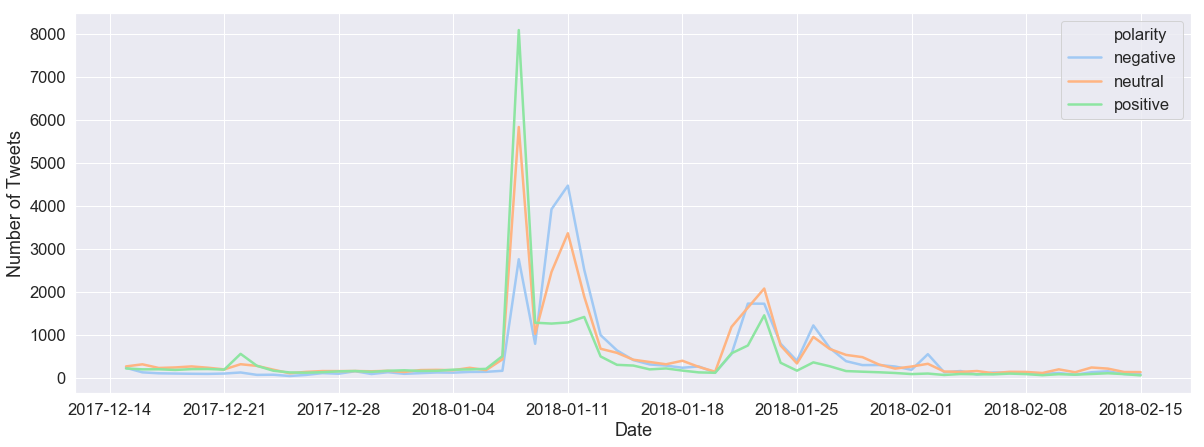

In [13]:
dims = (20, 7)
fig, ax = plt.subplots(figsize=dims)

ax = sns.lineplot(ax = ax, x='timestamp', y='size', hue='polarity', palette='pastel', data=df)
ax.set_xlabel("Date")
ax.set_ylabel("Number of Tweets")

In [26]:
from wordcloud import WordCloud, STOPWORDS
import string

In [42]:
# the regex used to detect words is a combination of normal words, ascii art, and emojis
# 2+ consecutive letters (also include apostrophes), e.x It's
normal_word = r"(?:\w[\w']+)"
# 2+ consecutive punctuations, e.x. :)
ascii_art = r"(?:[{punctuation}][{punctuation}]+)".format(punctuation=string.punctuation)
# a single character that is not alpha_numeric or other ascii printable
emoji = r"(?:[^\s])(?<![\w{ascii_printable}])".format(ascii_printable=string.printable)
regexp = r"{normal_word}|{ascii_art}|{emoji}".format(normal_word=normal_word, ascii_art=ascii_art,
                                                     emoji=emoji)


words = ' '.join(tweets['text'])

wordcloud = WordCloud(max_words=500, scale=3, background_color='white', regexp=regexp).generate(no_urls_no_tags)

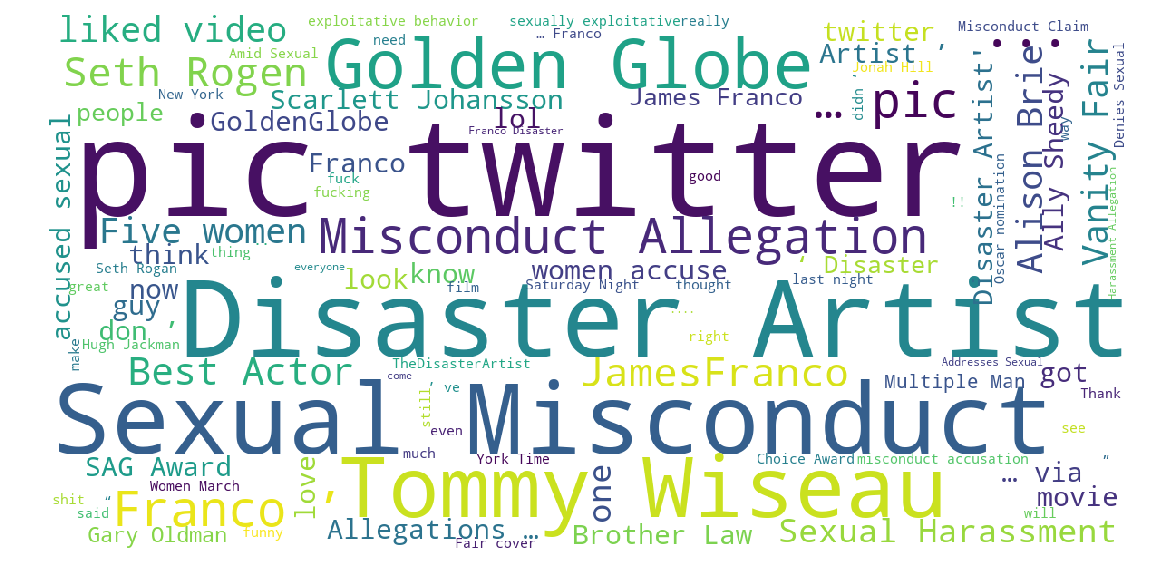

In [49]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file('james_franco_cloud.png')

Check out this website to do word to frequency
https://github.com/Mantej-Singh/Word-Frequency---Python/blob/master/Word%20Frequency.ipynb